1.  Завдання щодо генерації текстів трансформерів. 
Вирішив завдання щодо генерації текстів завдяки україномовної моделі.  

In [109]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

#import pathlib
import random
import string
import re
import numpy as np

import tensorflow.data as tf_data
import tensorflow.strings as tf_strings
import tensorflow as tf

import keras
from keras import layers
from keras import ops
from keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [110]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mykras/ukrainian-texts")

In [111]:
print(os.path.getsize(path))
texts = os.listdir(path)

192


In [112]:
for file in texts:
    print(os.path.getsize(path +"/"+ file))
    print(file)
    print()


1853585
Franko_-Zibrannya-tvoriv-u-p-yatdesyati-tomah-literaturno-kritichni-praci-1900-1902-tom-33-.382254.txt

153104
Lys_mykyta.txt

144776
Franko_Ivan-Franko-pro-Grigoriya-Skovorodu-.382401.txt

156193
Lisova_pisnya_1371650989.txt



In [113]:
Franko_50_tomes = (path +"/"+ texts[0])

In [114]:
with open(Franko_50_tomes) as f:
    lines = f.read().split("\n")[:-1]
with open(Franko_50_tomes) as f:
    lines_2 = f.read().split("\n")[:-1]
print(len(lines))


4896


In [115]:
for line in range(len(lines)):
    lines[line] = lines[line].lower()
    lines[line] = ' '.join(lines[line].split())
    lines[line] = ' '.join(lines[line].split("\ufeff"))

In [116]:
for i in range(len(lines)):
    if len(lines[i]) == 0:
        print(i)

5
2179
2181
2329
2336
2581
2583
2610
2612
2614
2622
2626
2632
2638
2646
2650
2652
4889
4890
4891
4892
4894
4895


In [117]:
lines = list(filter(None, lines))

In [118]:
for i in range(len(lines)):
    if len(lines[i]) == 1:
        print(lines[i], i)
        #print(i)
print(len(lines))

ф 22
7 32
8 36
і 464
ш 582
і 599
v 668
і 1549
v 1737
і 1867
і 2038
« 2116
v 2282
j 2324
» 2574
7 2575
» 2578
8 2579
» 2580
» 2582
» 2584
9 2585
» 2586
» 2588
» 2590
» 2591
» 2594
» 2596
» 2597
» 2599
» 2601
» 2606
» 2610
» 2613
» 2616
» 2618
» 2621
» 2623
» 2626
» 2628
» 2630
» 2633
» 2637
» 2639
» 2641
4873


In [119]:
text_split_sentences = []
j = -1
for indx, line in enumerate(lines):
    sentences = line.split(".")
    #text_split_sentences.append()
    i = 0
    while i < len(sentences):
        if (j > 0) & (len(sentences[i]) < 3):
            #print(sentences[i])
            text_split_sentences[j] += " " + sentences[i]
            if len(sentences) > i + 1:
                text_split_sentences[j] += " " + sentences[i + 1]
                print(text_split_sentences[j], "!!!")
                sentences.pop(i)
            sentences.pop(i)
            #print(sentences[i - 1])
            #sentences.remove(i)
            #print(sentences[i], len(sentences[i]))
            #print(text_split_sentences[i - 1], indx)
        else:
            text_split_sentences.append(sentences[i])
            i += 1
            j += 1
        
    #print(indx)

інститут літератури ім  т  г !!!
 т% гордієнко о  /  дей !!!
б * а і деркач (заступник голови) /  оі дзеверін !!!
ві юі євдокименко о  6і засенко !!!
ві юі євдокименко о  6і засенко д  ві затонський !!!
ві юі євдокименко о  6і засенко д  ві затонський с  д* зубков !!!
ві юі євдокименко о  6і засенко д  ві затонський с  д* зубков 6  пі кирилюк (голова) !!!
ві юі євдокименко о  6і засенко д  ві затонський с  д* зубков 6  пі кирилюк (голова) п  йі колесник н, б* крутікова 1 ф !!!
ві юі євдокименко о  6і засенко д  ві затонський с  д* зубков 6  пі кирилюк (голова) п  йі колесник н, б* крутікова 1 ф  6  лось в !!!
ві юі євдокименко о  6і засенко д  ві затонський с  д* зубков 6  пі кирилюк (голова) п  йі колесник н, б* крутікова 1 ф  6  лось в  л  микитась !!!
ві юі євдокименко о  6і засенко д  ві затонський с  д* зубков 6  пі кирилюк (голова) п  йі колесник н, б* крутікова 1 ф  6  лось в  л  микитась ф  я !!!
упорядкування та коментарі н  о, вишневської та ні і !!!
додаю ще кілька слів і ві

In [120]:
text_split_sentences[35]

' артист ніколи не кладе собі такої мети, бо коли би так було справді, він написав би статистичну, чи економічну, чи історичну монографію і мета була б осягнена'

In [121]:
max_seq_len = max([len(sentence.split()) for sentence in text_split_sentences])
max_seq_len

129

In [122]:
test = [1, 2, 3, 4]
test[-1:]

[4]

In [123]:
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

In [124]:

def custom_standardization(input_string):
    lowercase = tf_strings.lower(input_string)
    return tf_strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

In [125]:
def splitting_long_stentence(sentence, result = [], max_size = 30):
    l = len(sentence.split())
    if l < max_size:
        result.append(sentence)
        return
    result.append(' '.join(sentence.split()[:max_size]))
    splitting_long_stentence(' '.join(sentence.split()[max_size:]), result = result, max_size = max_size)
       

In [126]:
split_sentences = []
for text in text_split_sentences:
    splitting_long_stentence(text, split_sentences, 25)

In [127]:
text_pairs = []
for i in range(len(split_sentences) - 1):
    text_pairs.append((split_sentences[i], split_sentences[i + 1]))

In [128]:
split_sentences

['іван франко',
 'академія наук української рср',
 'інститут літератури ім  т  г',
 ' шевченка',
 'іван франко зібрання творів у п’ятдесяти томах',
 'літературно-критичні праці (1900—1902) том 33',
 'видавництво «наукова думка» київ—1982',
 'редакційна колегія:',
 'м* д> бернштейн г* д* вервес л',
 ' т% гордієнко о  /  дей',
 'б * а і деркач (заступник голови) /  оі дзеверін',
 'ві юі євдокименко о 6і засенко д ві затонський с д* зубков 6 пі кирилюк (голова) п йі колесник н, б* крутікова 1 ф 6',
 'лось в л микитась ф я',
 ' погребенник (відповідальний секретар) є',
 ' сі шабліовський мі т',
 ' дценко',
 'редактор тому',
 'пі йі колесник',
 'упорядкування та коментарі н  о, вишневської та ні і',
 ' чорної',
 'редакція художньої літератури ф',
 '4603000000',
 '020',
 'м221(04) 82',
 'передплатне',
 '© видавництво «наукова думка», 1982',
 'дослідження',
 'статті',
 'матеріали',
 '[примітка до статті ю',
 ' кміта* «карпенко-карий (іван тобілевич)»]',
 'містячи сю старанно оброблену студію 

In [129]:
max_seq_len = max([len(sentence.split()) for sentence in split_sentences])
max_seq_len

25

In [130]:
max_features = 40000
sequence_length = max_seq_len
vectorize_layer_v = keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
    standardize = custom_standardization
)
vectorize_layer_v.adapt(lines)
voc = vectorize_layer_v.get_vocabulary()

In [131]:
random.Random(131).shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]

print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")


13788 total pairs
9652 training pairs
2068 validation pairs
2068 test pairs


In [132]:
batch_size = 16  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.

In [133]:
print(len(voc))
vocab_size = len(voc) + 2
vocab_size

39175


39177

In [134]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = ops.cast(mask[:, None, :], dtype="int32")
        else:
            padding_mask = None

        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "dense_dim": self.dense_dim,
                "num_heads": self.num_heads,
            }
        )
        return config

In [135]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = ops.shape(inputs)[-1]
        positions = ops.arange(0, length, 1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return ops.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "sequence_length": self.sequence_length,
                "vocab_size": self.vocab_size,
                "embed_dim": self.embed_dim,
            }
        )
        return config

In [136]:

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(latent_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        inputs, encoder_outputs = inputs
        causal_mask = self.get_causal_attention_mask(inputs)

        if mask is None:
            inputs_padding_mask, encoder_outputs_padding_mask = None, None
        else:
            inputs_padding_mask, encoder_outputs_padding_mask = mask

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask,
            query_mask=inputs_padding_mask,
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            query_mask=inputs_padding_mask,
            key_mask=encoder_outputs_padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = ops.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = ops.arange(sequence_length)[:, None]
        j = ops.arange(sequence_length)
        mask = ops.cast(i >= j, dtype="int32")
        mask = ops.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = ops.concatenate(
            [ops.expand_dims(batch_size, -1), ops.convert_to_tensor([1, 1])],
            axis=0,
        )
        return ops.tile(mask, mult)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "latent_dim": self.latent_dim,
                "num_heads": self.num_heads,
            }
        )
        return config


In [137]:
def text_transformer_o():
    text_input = keras.Input(shape=(1,), dtype=tf.string, name='text')
    encoder_inputs = vectorize_layer_v(text_input)
    x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
    encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
    encoder = keras.Model(encoder_inputs, encoder_outputs)

    decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
    encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
    x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
    x = TransformerDecoder(embed_dim, latent_dim, num_heads)([x, encoder_outputs])
    x = layers.Dropout(0.5)(x)
    decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
    decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

    transformer = keras.Model(
        {"encoder_inputs": encoder_inputs, "decoder_inputs": decoder_inputs},
        decoder_outputs,
        name="transformer",
    )
    return transformer

In [138]:
num_heads = 8
embed_dim = 256
latent_dim = 2048
transformer = text_transformer()

In [139]:
def format_dataset(x, y):
    x = vectorize_layer_v(x)
    y = vectorize_layer_v(y)
    return (
        {
            "encoder_inputs": x,
            "decoder_inputs": y,
        },
        y,
    )

In [140]:
def make_dataset(pairs):
    x, y = zip(*pairs)
    x_texts = list(x)
    y_texts = list(y)
    dataset = tf_data.Dataset.from_tensor_slices((x_texts, y_texts))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.cache().shuffle(2048).prefetch(16)

In [141]:
def plot_hist(history_dict):
    accuracy_values = history_dict["accuracy"]
    val_accuracy_values = history_dict["val_accuracy"]
    epochs = range(1, len(accuracy_values) + 1)
    plt.plot(epochs, accuracy_values, "r", label="Training accuracy")
    plt.plot(epochs, val_accuracy_values, "g", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def add_hist_dict(dictionaries):
    result = {"accuracy" : [],"val_accuracy": []}
    for dictionary in dictionaries:
        result["accuracy"] += dictionary["accuracy"]
        result["val_accuracy"] += dictionary["val_accuracy"]
    return result

In [142]:
train_ds = make_dataset(train_pairs)
test_ds = make_dataset(test_pairs)
val_ds = make_dataset(val_pairs)

In [143]:
for inputs, targets in val_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")


inputs["encoder_inputs"].shape: (16, 25)
inputs["decoder_inputs"].shape: (16, 25)
targets.shape: (16, 25)


In [144]:
text_pairs_st_en =[]
for pair in text_pairs:
    text_pairs_st_en.append((pair[0], "[start]" + pair[1] + "[end]"))

In [145]:
text_pairs_y_en = [pair[1] for pair in text_pairs_st_en]

In [146]:
max_features = 40000
sequence_length = max_seq_len
vectorize_layer_se = keras.layers.TextVectorization(
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length,
    standardize = custom_standardization
)
vectorize_layer_se.adapt(text_pairs_y_en)
voc_2 = vectorize_layer_se.get_vocabulary()
vocab_size_2 = len(voc_2) + 1

In [147]:
train_sten_ds = make_dataset(text_pairs_st_en)
test_sten_ds = make_dataset(text_pairs_st_en)
val_sten_ds = make_dataset(text_pairs_st_en)

In [148]:
def text_transformer_1():
    #encoder_inputs = keras.Input(shape=(None,), dtype=tf.string, name="encoder_inputs")
    #encoded = vectorize_layer_v(encoder_inputs)
    encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
    x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
    encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
    encoder = keras.Model(encoder_inputs, encoder_outputs)

    decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
    encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
    x = PositionalEmbedding(sequence_length, vocab_size_2, embed_dim)(decoder_inputs)
    x = TransformerDecoder(embed_dim, latent_dim, num_heads)([x, encoder_outputs])
    x = layers.Dropout(0.5)(x)
    decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
    decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

    transformer = keras.Model(
        {"encoder_inputs": encoder_inputs, "decoder_inputs": decoder_inputs},
        decoder_outputs,
        name="transformer",
    )

    transformer.summary()
    transformer.compile(
        "rmsprop",
        loss=keras.losses.SparseCategoricalCrossentropy(ignore_class = 0),
        metrics=["accuracy"],
    )
    return transformer

In [149]:
transformer_1 = text_transformer_1()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 256) │ 10,035,712 │ encoder_inputs[0… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_20        │ (None, None)      │          0 │ encoder_inputs[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 256) │ 10,246,656 │ decoder_inputs[0… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, None, 256) │  3,155,456 │ positional_embed… │
│ (TransformerEncode… │                   │            │ not_equal_20[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_21        │ (None, None)      │          0 │ decoder_inputs[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_decode… │ (None, None, 256) │  5,259,520 │ positional_embed… │
│ (TransformerDecode… │                   │            │ transformer_enco… │
│                     │                   │            │ not_equal_21[0][… │
│                     │                   │            │ not_equal_20[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, None, 256) │          0 │ transformer_deco… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, None,      │ 10,068,489 │ dropout_43[0][0]  │
│                     │ 39177)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,765,833 (147.88 MB)

 Trainable params: 38,765,833 (147.88 MB)

 Non-trainable params: 0 (0.00 B)

In [150]:
epochs = 2

try:
    transformer_1.load_weights(f"transformer/save_at_{epochs}.keras")
    with open(f'transformer/trainHistoryDict_{epochs}', "rb") as file_pi:
        history_se_1 = pickle.load(file_pi)

except:
    history_se_1 = transformer_1.fit(train_sten_ds, validation_data = val_sten_ds, epochs=epochs,
        callbacks = [
            keras.callbacks.ModelCheckpoint("transformer/save_at_{epoch}.keras", save_weights_only = False),
        ]
    )

    with open(f'transformer/trainHistoryDict_{epochs}', 'wb') as file_pi:
        pickle.dump(history_se_1.history, file_pi)
        history_dict_se_1 = history_se_1.history


Epoch 1/2
862/862 ━━━━━━━━━━━━━━━━━━━━ 1071s 1s/step - accuracy: 0.2091 - loss: 5.9451 - val_accuracy: 0.3477 - val_loss: 3.2092
Epoch 2/2
862/862 ━━━━━━━━━━━━━━━━━━━━ 993s 1s/step - accuracy: 0.3408 - loss: 2.9731 - val_accuracy: 0.4058 - val_loss: 2.1409


In [151]:
voc
index_lookup = dict(zip(range(len(voc)), voc))
max_decoded_sentence_length = 25


def decode_sequence_1(input_sentence, vect_l, model):
    decoded_sentence = ""
    tokenized_input_sentence = vectorize_layer_v([input_sentence])
    for i in range(max_decoded_sentence_length - 1):
        tokenized_target_sentence = vect_l([decoded_sentence])[:, :-1]
        predictions = model(
            {
                "encoder_inputs": tokenized_input_sentence,
                "decoder_inputs": tokenized_target_sentence,
            }
        )

        # ops.argmax(predictions[0, i, :]) is not a concrete value for jax here
        #print(ops.argmax(predictions[0, i, :]))
        sampled_token_index = ops.convert_to_numpy(
            ops.argmax(predictions[0, i, :])
        ).item(0)
        #print(ops.argmax(predictions[0, i, :]))
        sampled_token = index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
            break
    return decoded_sentence


test_inp_texts = [pair[0] for pair in test_pairs]
for _ in range(7):
    input_sentence = random.choice(test_inp_texts)
    translated = decode_sequence_1(input_sentence, vectorize_layer_se, transformer_1)
    print(input_sentence)
    print(translated)

 при кожному такому заході треба вперше переправитись через найстрашніший поріг-ненаситець — цензуру нашу
 богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан шумлянського богдан шумлянського шумлянського шумлянського богдан богдан шумлянського
 перетца «историко-литературные исследования и материалы  т  1
 богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан шумлянського богдан шумлянського шумлянського шумлянського богдан богдан шумлянського
«в нас кухарка — у-ух, злодійка! — шепче пані потайки:
 богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан шумлянського богдан шумлянського шумлянського шумлянського богдан богдан шумлянського
 ми якбисьмо не довірювали один одному,
 богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан богдан шумлянського богдан шумлян

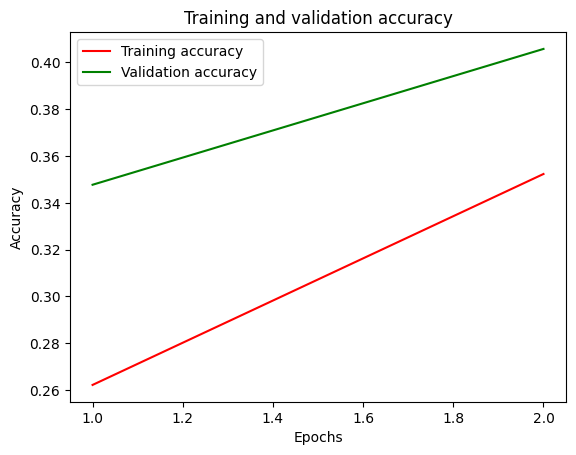

In [152]:
plot_hist(history_dict_se_1)


In [153]:
epochs = 7

try:
    transformer_1.load_weights(f"transformer/save_at_{epochs}.keras")
    with open(f'transformer/trainHistoryDict_{epochs}', "rb") as file_pi:
        history_dict_se_2_7 = pickle.load(file_pi)

except:
    history_se_2_7 = transformer_1.fit(train_sten_ds, validation_data = val_sten_ds, epochs=epochs,initial_epoch = 2,
        callbacks = [
            keras.callbacks.ModelCheckpoint("transformer/save_at_{epoch}.keras", save_weights_only = False),
        ]
    )

    with open(f'transformer/trainHistoryDict_{epochs}', 'wb') as file_pi:
        pickle.dump(history_se_2_7.history, file_pi)
        history_dict_se_2_7 = history_se_2_7.history


Epoch 3/7
862/862 ━━━━━━━━━━━━━━━━━━━━ 996s 1s/step - accuracy: 0.3870 - loss: 2.1325 - val_accuracy: 0.4348 - val_loss: 1.6208
Epoch 4/7
862/862 ━━━━━━━━━━━━━━━━━━━━ 1000s 1s/step - accuracy: 0.4030 - loss: 1.6774 - val_accuracy: 0.4706 - val_loss: 1.4008
Epoch 5/7
862/862 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.4119 - loss: 1.5123 - val_accuracy: 0.4712 - val_loss: 1.4299
Epoch 6/7
862/862 ━━━━━━━━━━━━━━━━━━━━ 995s 1s/step - accuracy: 0.4133 - loss: 1.6335 - val_accuracy: 0.4441 - val_loss: 1.7025
Epoch 7/7
862/862 ━━━━━━━━━━━━━━━━━━━━ 996s 1s/step - accuracy: 0.3967 - loss: 1.9837 - val_accuracy: 0.4168 - val_loss: 2.1267


In [154]:

voc
index_lookup = dict(zip(range(len(voc)), voc))
max_decoded_sentence_length = 25


test_inp_texts = [pair[0] for pair in test_pairs]
for _ in range(2):
    input_sentence = random.choice(test_inp_texts)
    translated = decode_sequence_1(input_sentence, vectorize_layer_se, transformer_1)
    print(input_sentence)
    print(translated)

старицького, і де сам текст його писань не давав підстави до кпин, там вони придумували зі свого власного концепту карикатурні речення й слова, приписували їх
 признається фірмою фірмою фірмою фірмою фірмою дівчина фірмою фірмою фірмою фірмою фірмою фірмою дівчина дівчина дівчина дівчина дівчина фірмою дівчина дівчина дівчина фірмою дівчина
, карпенко-карий, дозволяли грати свої п’єси тільки своїй трупі
 признається фірмою фірмою фірмою фірмою фірмою дівчина фірмою дівчина фірмою фірмою фірмою фірмою дівчина дівчина дівчина дівчина дівчина фірмою дівчина дівчина дівчина фірмою дівчина


In [155]:
epochs = 10

try:
    transformer_1.load_weights(f"transformer/save_at_{epochs}.keras")
    with open(f'transformer/trainHistoryDict_{epochs}', "rb") as file_pi:
        history_dict_se_7_10 = pickle.load(file_pi)

except:
    history_se_7_10 = transformer_1.fit(train_sten_ds, validation_data = val_sten_ds, epochs=epochs,initial_epoch = 7,
        callbacks = [
            keras.callbacks.ModelCheckpoint("transformer/save_at_{epoch}.keras", save_weights_only = False),
        ]
    )

    with open(f'transformer/trainHistoryDict_{epochs}', 'wb') as file_pi:
        pickle.dump(history_se_7_10.history, file_pi)
        history_dict_se_7_10 = history_se_7_10.history

Epoch 8/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1000s 1s/step - accuracy: 0.3704 - loss: 2.4049 - val_accuracy: 0.3985 - val_loss: 2.4044
Epoch 9/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.3588 - loss: 2.6276 - val_accuracy: 0.3877 - val_loss: 2.5707
Epoch 10/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 997s 1s/step - accuracy: 0.3549 - loss: 2.8395 - val_accuracy: 0.3823 - val_loss: 2.6920


In [156]:
epochs = 30

try:
    transformer_1.load_weights(f"transformer/save_at_{epochs}.keras")
    with open(f'transformer/trainHistoryDict_{epochs}', "rb") as file_pi:
        history_dict_se_10_30 = pickle.load(file_pi)

except:
    history_se_10_15 = transformer_1.fit(train_sten_ds, validation_data = val_sten_ds, epochs=epochs,initial_epoch = 10,
        callbacks = [
            keras.callbacks.ModelCheckpoint("transformer/save_at_{epoch}.keras", save_weights_only = False),
        ]
    )

    with open(f'transformer/trainHistoryDict_{epochs}', 'wb') as file_pi:
        pickle.dump(history_se_10_30.history, file_pi)
        history_dict_se_10_30 = history_se_10_30.history

Epoch 11/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 997s 1s/step - accuracy: 0.3509 - loss: 2.9138 - val_accuracy: 0.3772 - val_loss: 2.7827
Epoch 12/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.3451 - loss: 3.0236 - val_accuracy: 0.3740 - val_loss: 2.8420
Epoch 13/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 996s 1s/step - accuracy: 0.3407 - loss: 3.1092 - val_accuracy: 0.3716 - val_loss: 2.8886
Epoch 14/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.3396 - loss: 3.1633 - val_accuracy: 0.3679 - val_loss: 2.9359
Epoch 15/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 1002s 1s/step - accuracy: 0.3313 - loss: 3.2214 - val_accuracy: 0.3681 - val_loss: 2.9787
Epoch 16/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 997s 1s/step - accuracy: 0.3309 - loss: 3.2751 - val_accuracy: 0.3665 - val_loss: 2.9995
Epoch 17/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 996s 1s/step - accuracy: 0.3278 - loss: 3.3270 - val_accuracy: 0.3635 - val_loss: 3.0324
Epoch 18/30
862/862 ━━━━━━━━━━━━━━━━━━━━ 992s 1s/step - accuracy: 0.3328 - loss: 3.2716 -

In [ ]:
transformer_1.evaluate(test_sten_ds)


voc
index_lookup = dict(zip(range(len(voc)), voc))
max_decoded_sentence_length = 25


test_inp_texts = [pair[0] for pair in test_pairs]
for _ in range(2):
    input_sentence = random.choice(test_inp_texts)
    translated = decode_sequence_1(input_sentence, vectorize_layer_se, transformer_1)
    print(input_sentence)
    print(translated)

  2/862 ━━━━━━━━━━━━━━━━━━━━ 3:25 239ms/step - accuracy: 0.3750 - loss: 2.1985

InvalidArgumentError: Graph execution error:

Detected at node 'transformer_1/positional_embedding_6_1/embedding_12_1/GatherV2' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/Gleb/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/gk/n5z332z96y77s_cf349_684w0000gn/T/ipykernel_4617/1218290615.py", line 9, in <module>
      history_se_1 = transformer_1.fit(train_ds, validation_data = val_ds, epochs=epochs,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 392, in fit
      val_logs = self.evaluate(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 481, in evaluate
      logs = self.test_function(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function
      opt_outputs = multi_step_on_iterator(iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator
      one_step_on_data(iterator.get_next())
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 110, in one_step_on_data
      outputs = self.distribute_strategy.run(step_function, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 87, in test_step
      y_pred = self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__
      outputs = super().__call__(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__
      return call_fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/models/functional.py", line 182, in call
      outputs = self._run_through_graph(
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph
      outputs = op(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/models/functional.py", line 632, in call
      return operation(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__
      outputs = super().__call__(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__
      return call_fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
      return fn(*args, **kwargs)
    File "/var/folders/gk/n5z332z96y77s_cf349_684w0000gn/T/ipykernel_4617/1442710168.py", line 17, in call
      embedded_tokens = self.token_embeddings(inputs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/layer.py", line 899, in __call__
      outputs = super().__call__(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/ops/operation.py", line 46, in __call__
      return call_fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
      return fn(*args, **kwargs)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py", line 140, in call
      outputs = ops.take(self.embeddings, inputs, axis=0)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/ops/numpy.py", line 5239, in take
      return backend.numpy.take(x, indices, axis=axis)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/backend/tensorflow/numpy.py", line 2063, in take
      return tf.gather(x, indices, axis=axis)
Node: 'transformer_1/positional_embedding_6_1/embedding_12_1/GatherV2'
indices[5,0] = 39115 is not in [0, 39023)
	 [[{{node transformer_1/positional_embedding_6_1/embedding_12_1/GatherV2}}]] [Op:__inference_multi_step_on_iterator_468776]

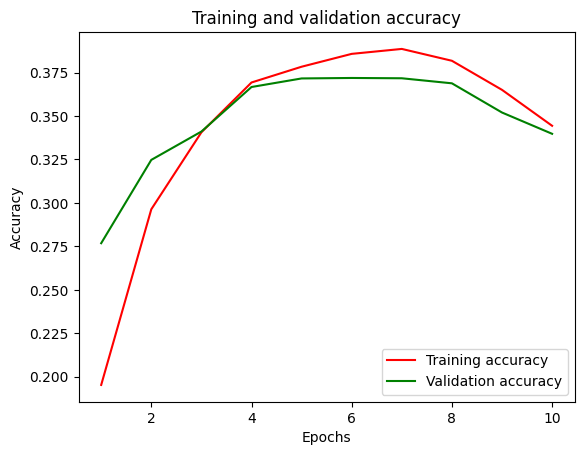

In [ ]:
plot_hist(add_hist_dict([history_dict_se_1, history_dict_se_2_7, history_dict_se_7_10, history_se_10_30]))

2. Проведіть експерименти з моделями бібліотеки Hugging Face (раніше - Hugging Face Transformers, https://huggingface.co/) за допомогою (наприклад) Pipeline модуля